## 06-3 주성분 분석

### 1) 차원과 차원축소

* 차원 : 다차원 배열과 1차원 배열에서의 차원 : 교재 319쪽 설명을 잘 읽어보자.

  과일 이미지 데이터는 300 x 100 x 100 개 값으로 이루어진 3차원 배열이다. 각 이미지는 100 x 100 2차원 배열이고 그런 이미지가 300개 있다. 2차원 배열로 된 각 이미지를 reshape()해서 1차원 배열로 만들었다고 하자. 1차원 배열은 모두 10,000개 픽셀 값으로 이루어져 있다. 각 픽셀을 하나의 feature로 본다면 하나의 이미지는 10,000개의 feature로 이루어진 데이터벡터가 된다. 이럴 경우 데이터는 10,000차원 벡터 300개로 이루어진다.

* 차원 축소 : 데이터를 가장 잘 나타내는 적은 수의 특성을 추출하는 방법

### 2) 주성분분석(PCA)

  * 주성분(principal components)

  교재 320-322쪽 그림들을 이용해서 공부해보자.

  제1 주성분 : 데이터의 분산이 가장 큰 방향, 데이터의 분포를 가장 잘 나타내는 방향.

  제2 주성분 : 제1 주성분 방향과 직교하면서 분산이 가장 큰 방향

  * 차원축소 (dimensionality reduction) : 만약 제1주성분 하나로만 데이터를 나타낸다면 원본데이터를 제1주성분 위에 투영시켜서 그 데이터의 값을 구한다. 즉 다차원 데이터를 주성분 방향의 1차원 데이터로 표현하는 것이다.

  일반적으로 우리가 가진 데이터들이 n차원 공간상의 벡터라고 할 때 PCA 방법을 이용하면 적은 수의 주성분만으로 데이터를 압축할 수 있다(물론 정보손실이 생긴다).

### 3) PCA 클래스

In [243]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-02-03 15:33:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-02-03 15:33:14--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-02-03 15:33:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [244]:
import numpy as np

data = np.load('fruits_300.npy')
ndata=data.reshape(-1,100**2)

print(data.shape,ndata.shape)

(300, 100, 100) (300, 10000)


PCA는 사이킷런의 `decomposition` 모듈안에 있다. 주성분의 수는 PCA 객체를 만들 때 아래와 같이 `n_components` 매개변수로 지정하면 된다 (아래에서는 50개).

In [245]:
from sklearn.decomposition import PCA

pca=PCA(n_components=50)
pca.fit(ndata)

PCA(n_components=50)

주성분 방향은 `components_`속성에 들어있다.

In [246]:
pca.components_.shape

(50, 10000)

아래 코드는 307쪽에서 만든 함수 코드로서 `draw_fruits()`는 한 줄에 10개씩 그림을 그리는 함수다.

In [247]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')

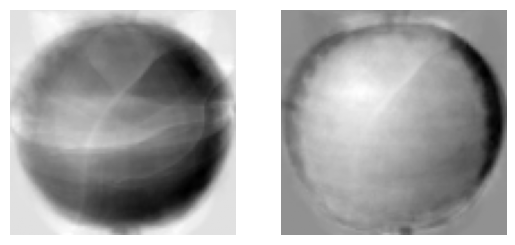

In [248]:
draw_fruits(m.components_.reshape(-1,100,100))

원본 데이터(ndata)를 주성분에 투영한 결과는 `transform()`으로 얻을 수 있다. 10,000차원 데이터가 50차원 데이터로 압축된다.

In [249]:
ndata.shape

(300, 10000)

In [250]:
pca_data = pca.transform(ndata)
pca_data.shape

(300, 50)

### 4) 원본 데이터 재구성

`inverse_transform()`을 이용하면 이렇게 압축한 데이터로 원본 데이터를 복원할 수도 있다.

In [251]:
inv_data=pca.inverse_transform(pca_data)
inv_data.shape

(300, 10000)

복원한 배열을 다시 3차원 배열로 바꾸어서 100개씩 순서대로 그림으로 그려보자. 물론 정보 손실을 피할 수는 없지만 단 50개 차원만으로도 세 가지 과일이 모두 제대로 복원된다.

In [252]:
inv_ndata = inv_data.reshape(-1, 100, 100)
inv_ndata.shape

(300, 100, 100)

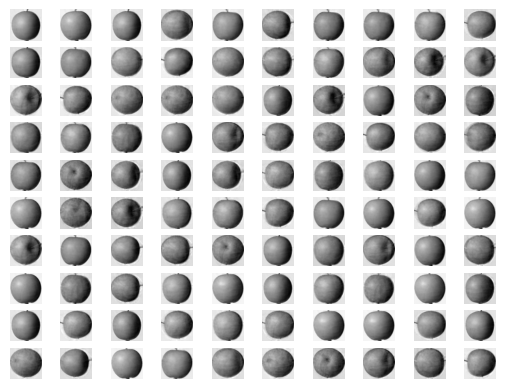

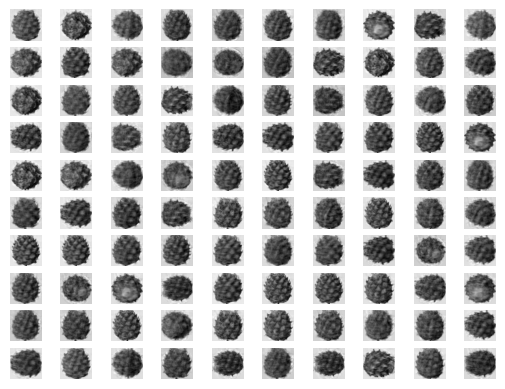

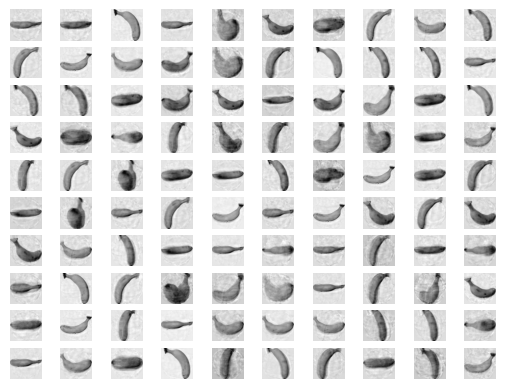

In [253]:
for start in [0, 100, 200]:
    draw_fruits(inv_ndata[start:start+100])
    print("\n")

### 5) 설명된 분산

`explained_variance_ratio_`는 주성분에 의해 전체 분산의 어느 정도가 설명되는지 알려준다.

In [254]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578896, 0.00511202, 0.00486382, 0.00480347,
       0.00447835, 0.00437316, 0.0040804 , 0.00389478, 0.00372445,
       0.00359281, 0.00331454, 0.0031779 , 0.0030424 , 0.0030372 ,
       0.00288879, 0.00275683, 0.00264882, 0.00255871, 0.00252094,
       0.00247345, 0.00239651, 0.00230856, 0.00221478, 0.00216819,
       0.00213801, 0.00196187, 0.0019292 , 0.00189917, 0.00184787,
       0.00182695, 0.0017309 , 0.00167781, 0.00160897, 0.00159812])

In [255]:
np.sum(pca.explained_variance_ratio_)

0.9215306913027483

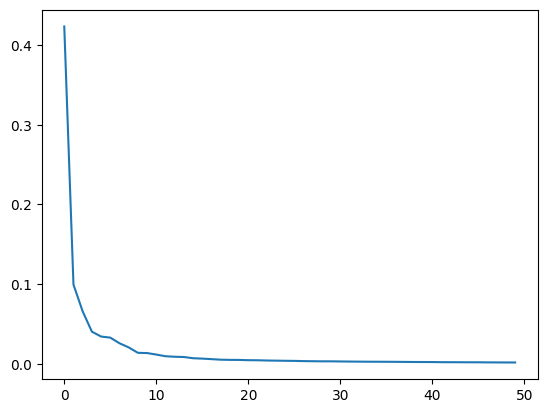

In [256]:
plt.plot(pca.explained_variance_ratio_)

그림을 보면 50개 가운데 처음 몇 개 주성분만 있어도 될 것 같다.

### 6) 다른 알고리즘과 함께 사용하기

비지도학습인 주성분분석으로 차원을 축소한 데이터를 지도학습인 분류에 이용해보자.

In [257]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()

In [258]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [259]:
np.bincount(target)

array([100, 100, 100])

원본데이터(`ndata`)와 차원을 축소한 데이터(`pca_data`)로 로지스틱 분류 모델을 학습했을 때 정확도와 훈련시간을 비교해보자.

In [260]:
from sklearn.model_selection import cross_validate

scores = cross_validate(m, ndata, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.088994026184082


In [261]:
scores = cross_validate(m, pca_data, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.020472383499145506


이번에는 차원을 더 줄여보자. `n_componets = 0.5`로 지정하면 전체 분산의 50%를 설명하는 주성분을 찾는다.

In [262]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.5)
pca.fit(ndata)

PCA(n_components=0.5)

In [264]:
pca.n_components_

2

주성분 단 두개면 분산의 절반을 설명할 수 있다.

In [266]:
pca_data = pca.transform(ndata)
pca_data.shape

(300, 2)

In [267]:
scores = cross_validate(m, pca_data, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03743491172790527


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

이번에는 차원축소한 데이터를 k-means 군집에 이용해보자.

In [268]:
from sklearn.cluster import KMeans

m = KMeans(n_clusters=3, random_state=0,n_init=10)
m.fit(pca_data)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [269]:
np.unique(m.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

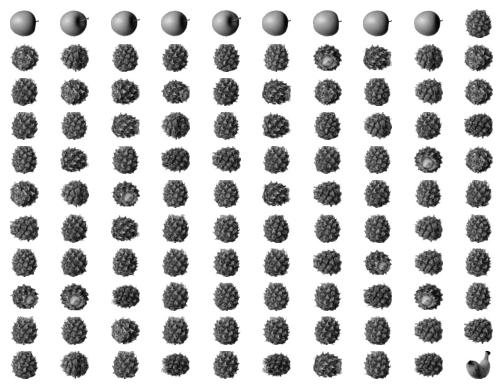

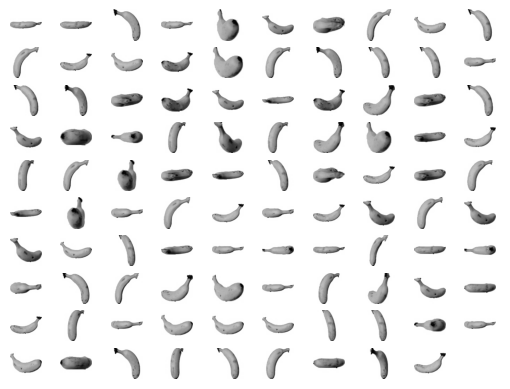

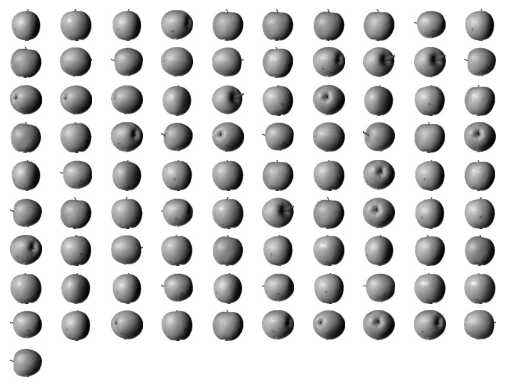

In [270]:
for label in range(0, 3):
    draw_fruits(data[m.labels_ == label])
    print("\n")

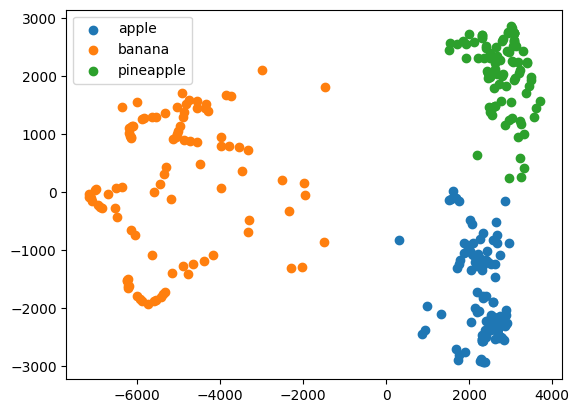

In [271]:
for label in range(0, 3):
    pdata = pca_data[m.labels_ == label]
    plt.scatter(pdata[:,0], pdata[:,1])

plt.legend(['apple', 'banana', 'pineapple'])